<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-1/blob/main/ML1_Capstone_Industrial_equipment_fault_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot
from IPython.display import IFrame

In [2]:
!kaggle datasets download -d dnkumars/industrial-equipment-monitoring-dataset

Dataset URL: https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset
License(s): apache-2.0
  0% 0.00/291k [00:00<?, ?B/s]
100% 291k/291k [00:00<00:00, 60.8MB/s]


In [3]:
import zipfile
zipfile_path = '/content/industrial-equipment-monitoring-dataset.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [4]:
dataframe=pd.read_csv("/content/equipment_anomaly_data.csv")
dataframe.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [5]:
dataframe["temperature"]=dataframe["temperature"].round(2)
dataframe["pressure"]=dataframe["pressure"].round(2)
dataframe["vibration"]=dataframe["vibration"].round(2)
dataframe["humidity"]=dataframe["humidity"].round(2)
dataframe.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.18,25.03,0.61,45.69,Turbine,Atlanta,0.0
1,75.74,22.95,2.34,41.87,Compressor,Chicago,0.0
2,71.36,27.28,1.39,58.95,Turbine,San Francisco,0.0
3,71.62,32.24,1.77,40.57,Pump,Atlanta,0.0
4,66.51,45.20,0.35,43.25,Pump,New York,0.0


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [7]:
dataframe.isnull().sum()

,0
temperature,0
pressure,0
vibration,0
humidity,0
equipment,0
location,0
faulty,0


In [8]:
dataframe.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922419,35.738015,1.611889,50.016575,0.099974
std,16.200082,10.381654,0.728573,11.841468,0.299985
min,10.270000,3.620000,-0.430000,10.220000,0.000000
25%,62.775000,29.490000,1.170000,42.615000,0.000000
50%,70.160000,35.230000,1.530000,50.025000,0.000000
75%,77.570000,41.160000,1.920000,57.340000,0.000000
max,149.690000,79.890000,4.990000,89.980000,1.000000


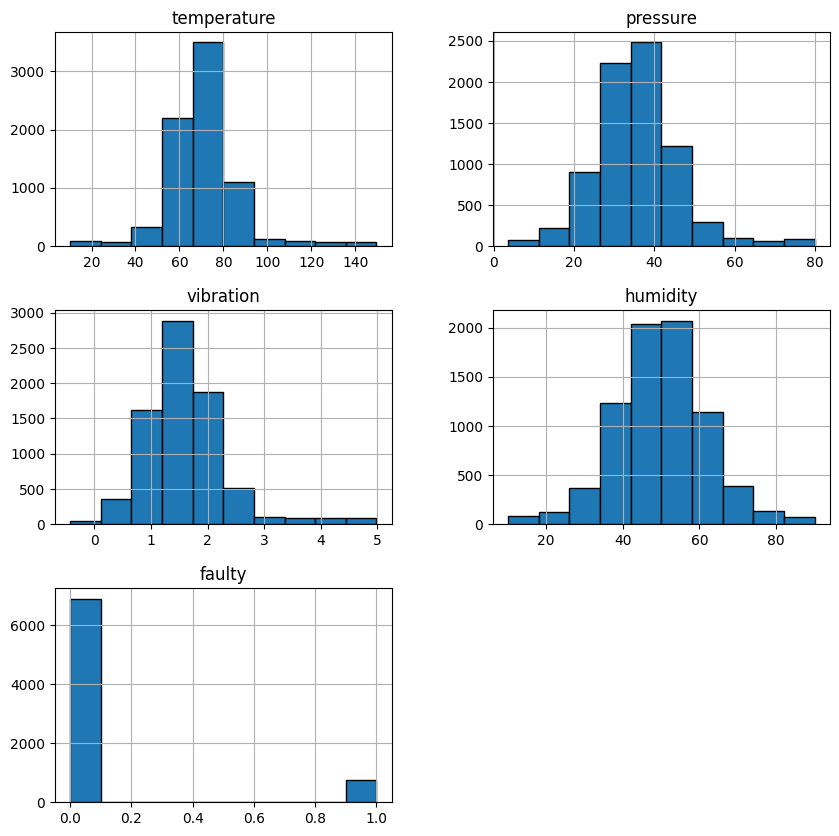

In [9]:
# ploting histograms for each column to visualize distributions
dataframe.hist(figsize=(10,10), edgecolor="black")
plt.show()

In [10]:
dataframe.columns


Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location', 'faulty'],
      dtype='object')

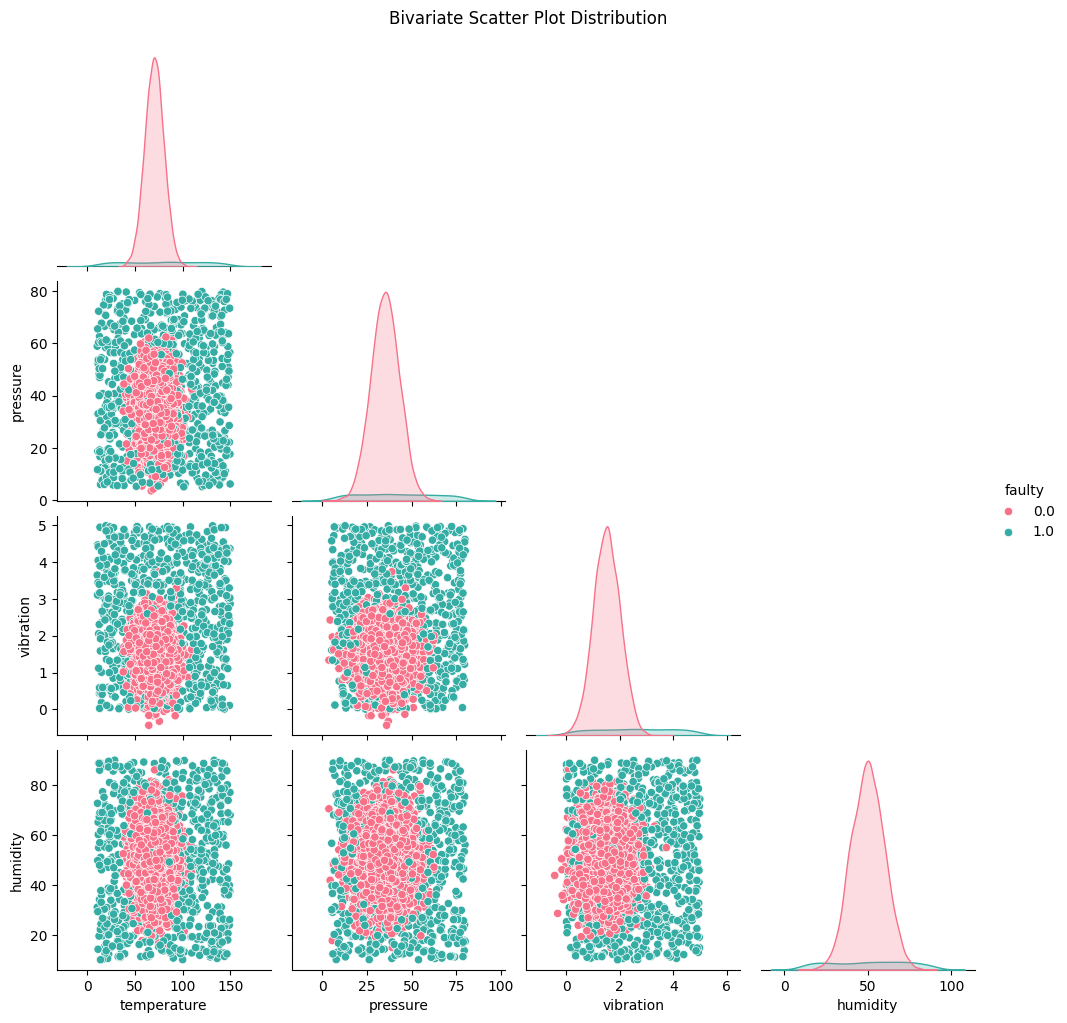

In [11]:
columns_to_plot = ['temperature', 'pressure', 'vibration', 'humidity', 'equipment','location', 'faulty']  # columns you want to plot
# Pairplot for bivariate scatter plot distributions
sns.pairplot(dataframe[columns_to_plot], diag_kind='kde', hue='faulty', palette='husl', corner=True)
plt.suptitle('Bivariate Scatter Plot Distribution', y=1.02)
plt.show()

<Figure size 6250x6250 with 0 Axes>

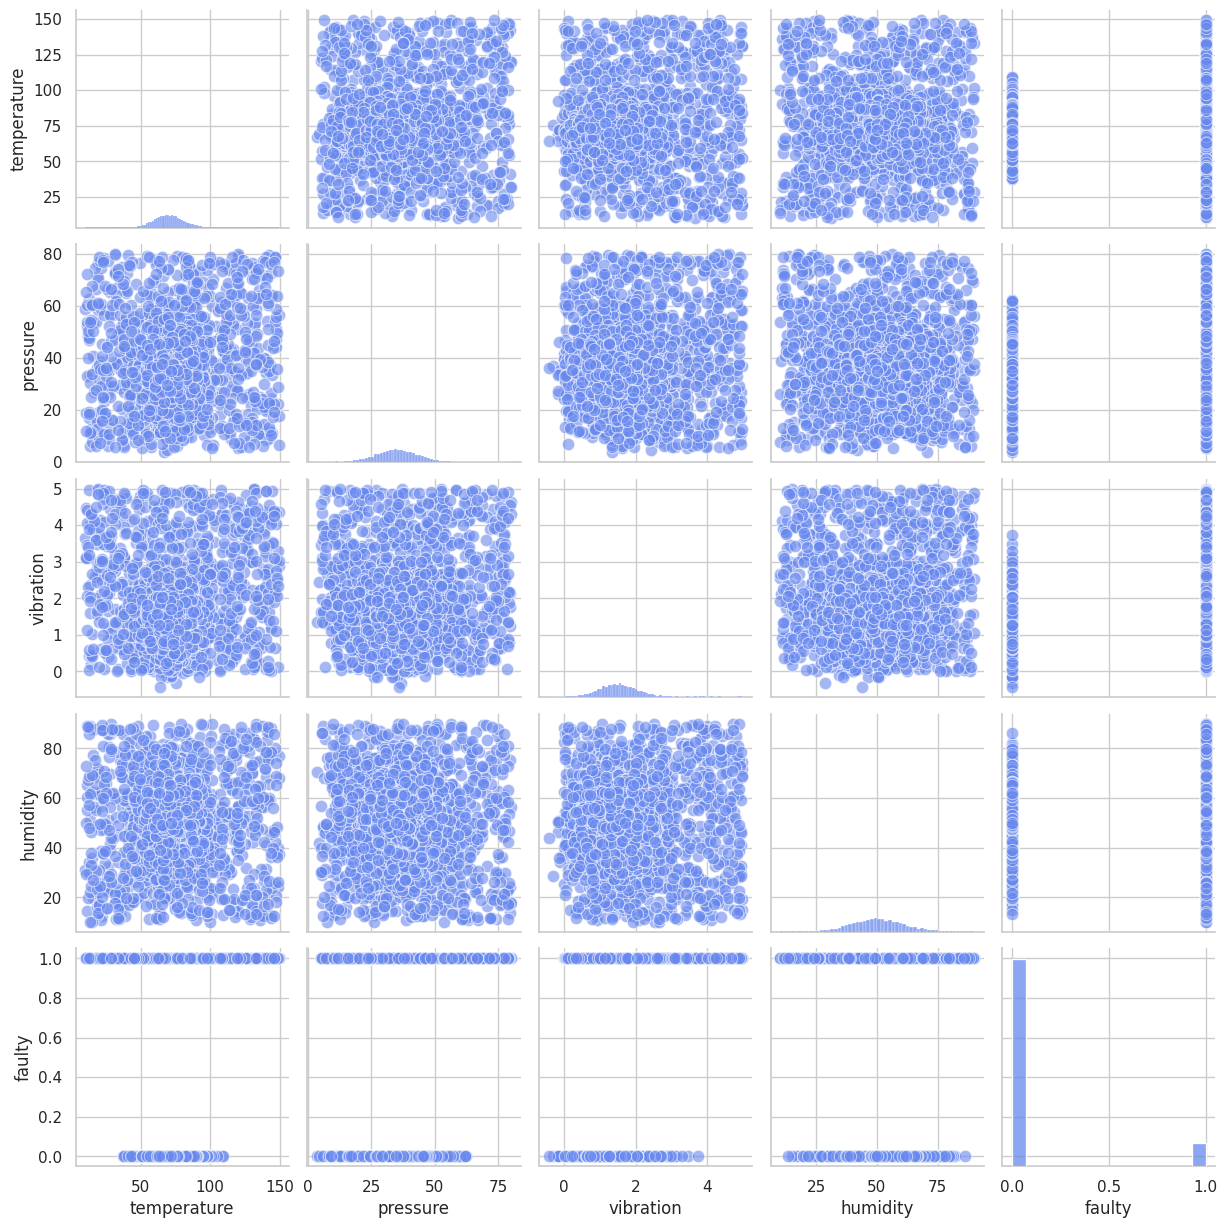

In [12]:
# observe for the float_data
plt.figure(figsize=(25, 25), dpi=250)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(dataframe.select_dtypes("number"), plot_kws={'alpha': 0.6, 's': 80})

Text(0, 0.5, 'Count')

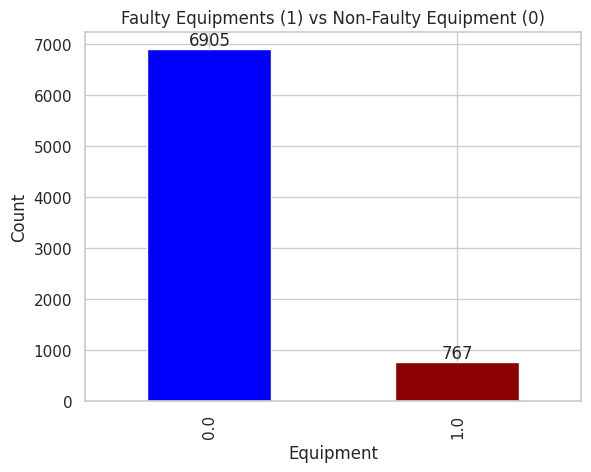

In [31]:
faulty_equipments=dataframe["faulty"].value_counts()
faulty_equipments.plot(kind="bar",color=['blue','darkred'])
for i,values in enumerate(faulty_equipments):
     plt.text(i,values,str(values),ha="center",va="bottom")

plt.title("Faulty Equipments (1) vs Non-Faulty Equipment (0)")
plt.xlabel("Equipment")
plt.ylabel("Count")

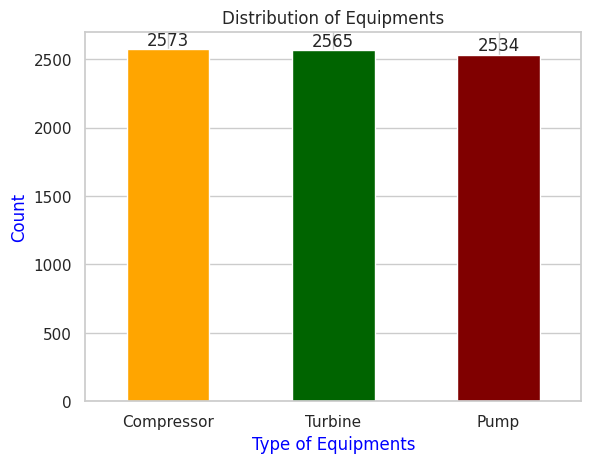

In [14]:
equipments = dataframe["equipment"].value_counts()
colors=['orange', 'darkgreen', 'maroon']
equipments.plot(kind="bar",color=colors)
for i,values in enumerate(equipments):
    plt.text(i,values,str(values),ha="center",va="bottom")

plt.xticks(rotation=0)
plt.xlabel("Type of Equipments",color="blue")
plt.ylabel("Count",font="arial",color="blue")
plt.title("Distribution of Equipments")
plt.show()

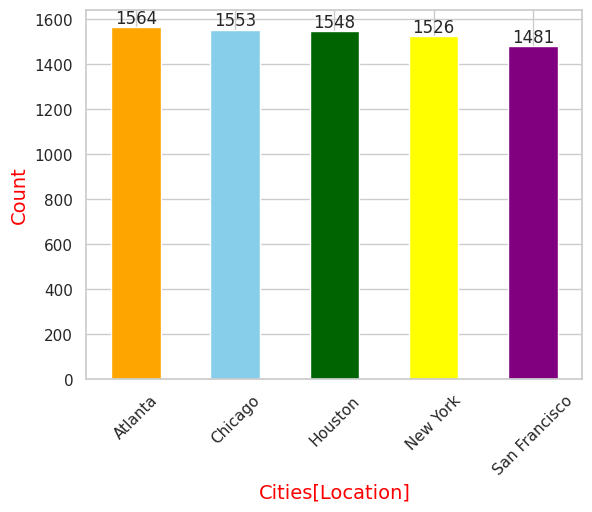

In [15]:
location_l=dataframe["location"].value_counts()
colors = ['orange', 'skyblue', 'darkgreen', 'yellow', 'purple']
location_l.plot(kind="bar",color=colors)
for i,values in enumerate(location_l):
    plt.text(i,values,str(values),ha="center",va="bottom")

plt.xlabel("Cities[Location]",color="red",fontsize=14)
plt.ylabel("Count",color="red",fontsize=14)
plt.xticks(rotation=45)
plt.show()

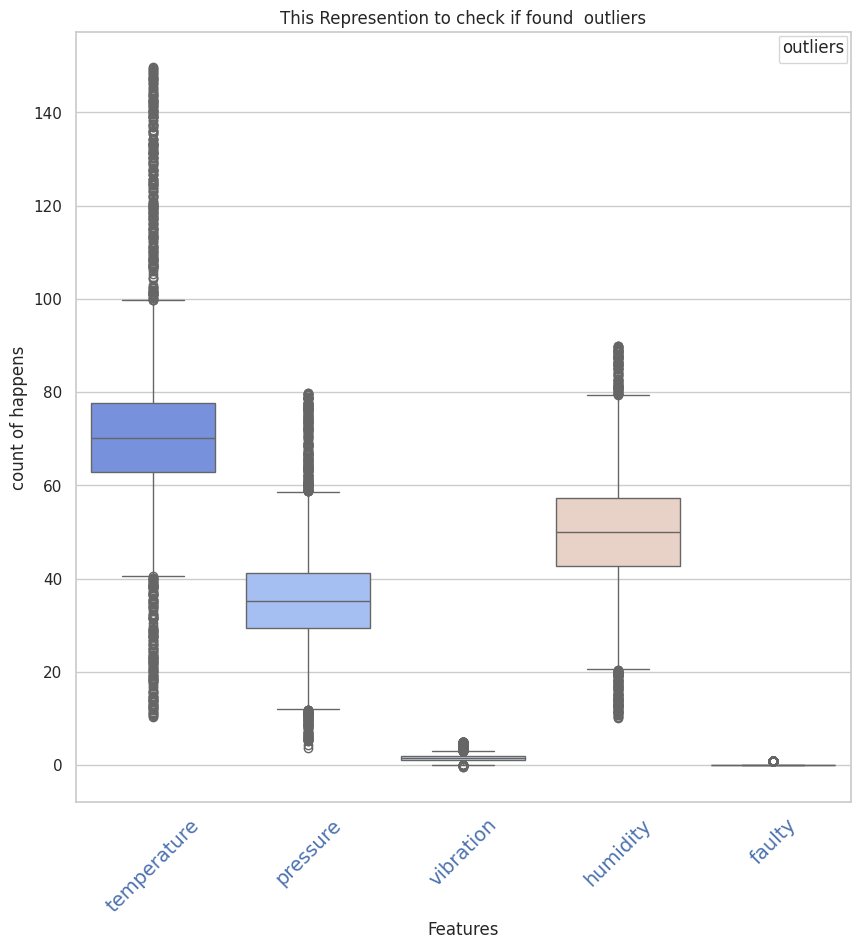

In [16]:
# from this Represention we discover that we found outliers :

#f1={"family":"serif","size":14,"color":"r"}
plt.figure(figsize=(10,10))
plt.title("This Represention to check if found  outliers")
plt.xlabel("Features")
plt.ylabel("count of happens",)
plt.xticks(rotation=45,color="b",fontsize=14)
sns.boxplot(dataframe)
plt.legend(title="outliers",prop={'size': 5})

Robust scaling
- This method is used to handle outliers better than standardization or normalization. It's based on percentiles, like the median and the interquartile range (IQR).

Mean normalization
- This technique is used when the data has a known range but varies around the mean. It centers the data around the mean and scales it between -1 and 1.


In [18]:
# Scaling columns
# Robust scaling humidity, temperature and pressure columns
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler=RobustScaler()
dataframe[["humidity","temperature","pressure"]]=scaler.fit_transform(dataframe[["humidity","temperature","pressure"]])
# normalization scaling of vibration column
scaler=MinMaxScaler()
dataframe[["vibration"]]=scaler.fit_transform(dataframe[["vibration"]])
dataframe.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,-0.809733,-0.874036,0.191882,-0.294397,Turbine,Atlanta,0.0
1,0.377154,-1.052271,0.511070,-0.553820,Compressor,Chicago,0.0
2,0.081108,-0.681234,0.335793,0.606112,Turbine,San Francisco,0.0
3,0.098682,-0.256213,0.405904,-0.642105,Pump,Atlanta,0.0
4,-0.246705,0.854327,0.143911,-0.460102,Pump,New York,0.0


In [19]:
print(dataframe['equipment'].value_counts())
print(dataframe['location'].value_counts())

equipment
Compressor    2573
Turbine       2565
Pump          2534
Name: count, dtype: int64
location
Atlanta          1564
Chicago          1553
Houston          1548
New York         1526
San Francisco    1481
Name: count, dtype: int64


In [20]:
# one hot encoding equipment and location columns
dataframe=pd.get_dummies(dataframe,columns=["equipment","location"])
dataframe.head()

,temperature,pressure,vibration,humidity,faulty,equipment_Compressor,equipment_Pump,equipment_Turbine,location_Atlanta,location_Chicago,location_Houston,location_New York,location_San Francisco
0,-0.809733,-0.874036,0.191882,-0.294397,0.0,False,False,True,True,False,False,False,False
1,0.377154,-1.052271,0.511070,-0.553820,0.0,True,False,False,False,True,False,False,False
2,0.081108,-0.681234,0.335793,0.606112,0.0,False,False,True,False,False,False,False,True
3,0.098682,-0.256213,0.405904,-0.642105,0.0,False,True,False,True,False,False,False,False
4,-0.246705,0.854327,0.143911,-0.460102,0.0,False,True,False,False,False,False,True,False


In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = dataframe.drop('faulty', axis=1)
y = dataframe['faulty']
# Apply SMOTE to balance the entire dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# After SMOTE
print("Resampled dataset class distribution:", Counter(y_balanced))

# Combine the resampled data into a new DataFrame
sample_df = pd.DataFrame(X_balanced, columns=X.columns)
sample_df['Class'] = y_balanced

Resampled dataset class distribution: Counter({0.0: 6905, 1.0: 6905})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [22]:
# Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5370, 12) (2302, 12) (5370,) (2302,)


In [23]:
# Data modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve
)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [24]:
# Random Forest Classifier
model = RandomForestClassifier(criterion='gini')
# Predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9800173761946134
Precision: 0.9400921658986175
Recall: 0.8607594936708861
F1 Score: 0.8986784140969163


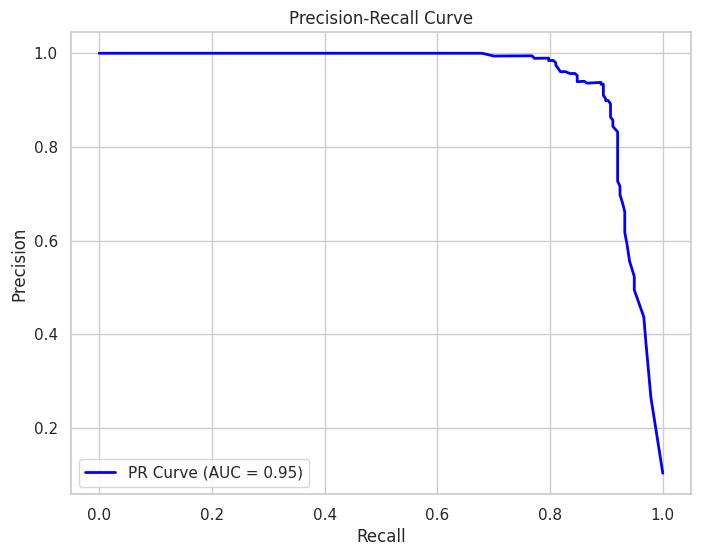

In [25]:
# Precision-Recall Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

In [26]:
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3)
}

In [27]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations to try
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)
# Fit the RandomizedSearchCV
random_search.fit(X_balanced, y_balanced)
# Best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 85}


In [28]:
# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2065
         1.0       1.00      1.00      1.00       237

    accuracy                           1.00      2302
   macro avg       1.00      1.00      1.00      2302
weighted avg       1.00      1.00      1.00      2302


Confusion Matrix:
 [[2064    1]
 [   1  236]]


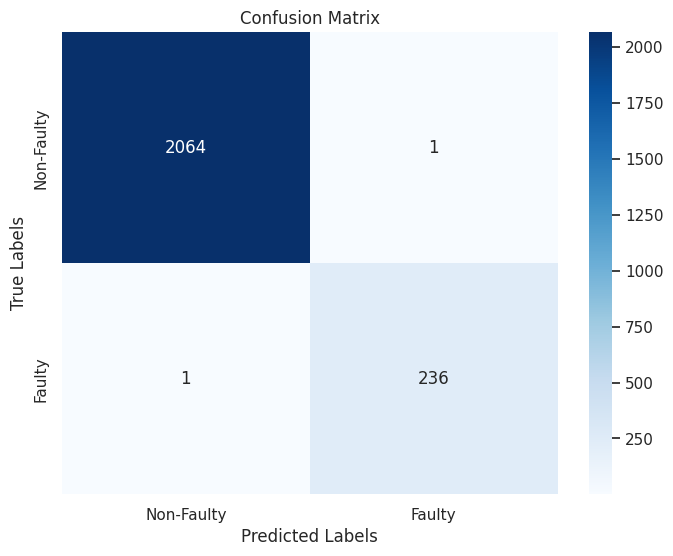

In [29]:
# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Class names
class_names = ['Non-Faulty', 'Faulty']
# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

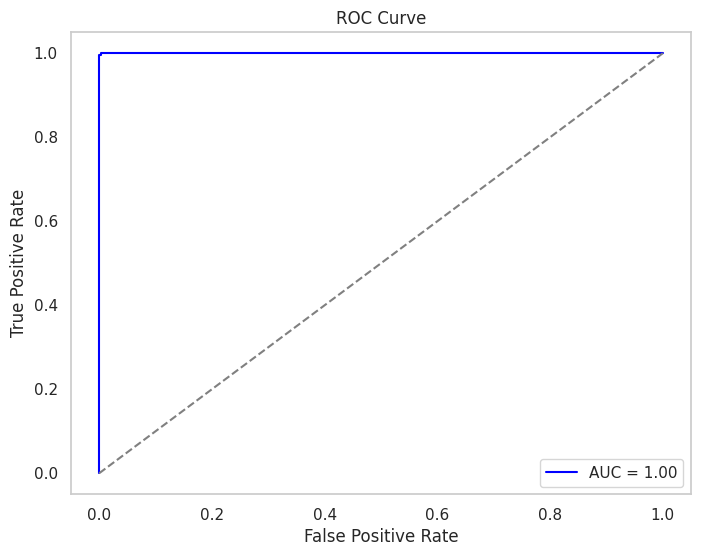

In [30]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()